📝 Data Wrangling – Part 3
🎯 Objective

In this notebook, we enrich the dataset with principal cast and crew information.
This step allows us to analyze:

Actor/actress impact on ratings.

Role distribution across movies.

Star power and collaborations.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📂 Step 1: Load Principals Data

title.principals → links movies (tconst) to people (nconst) with:

category (actor, actress, director, writer, cinematographer, etc.)

job (specific function if applicable)

characters (roles played in the movie).

In [2]:
chunks = []
for chunk in pd.read_csv("../data/title.principals.tsv", sep="\t", chunksize=500_000,usecols=['tconst', 'ordering', 'nconst', 'category']):
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

In [3]:
maindf3=pd.read_csv('../temp/maindfs/maindf3.csv')

In [4]:
maindf3

,movieID,title,year,runtime,genre,rating,votes,directors,writers,personID,role,name
0,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait
1,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait
2,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,director,Charles L. Gaskill
3,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0765026,writer,Victorien Sardou
4,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,writer,Charles L. Gaskill
...,...,...,...,...,...,...,...,...,...,...,...,...
216017,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm10538402,writer,Lorenzo Collalti
216018,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm5584269,writer,Alessandro Regaldo
216019,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,director,Pablo Agüero
216020,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,writer,Pablo Agüero


In [5]:
movie_tconst_set = set(maindf3['movieID'])

⚖️ Step 3: Aggregate Cast for Each Movie

Group actors per movieID into a list (e.g., [Tom Hanks, Meg Ryan, …]).

Store as a single column cast in the movie-level dataset.

In [6]:
df6=df
df6

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0005690,producer
3,tt0000001,4,nm0374658,cinematographer
4,tt0000002,1,nm0721526,director
...,...,...,...,...
93962722,tt9916880,17,nm0996406,director
93962723,tt9916880,18,nm1482639,writer
93962724,tt9916880,19,nm2586970,writer
93962725,tt9916880,20,nm1594058,producer


In [7]:
df6.rename(columns={'tconst':"movieID",'nconst':"personID"}, inplace=True)

In [ ]:
principals_grouped = df6.groupby("movieID").agg({
    "personID": list,
    "category": list
}).reset_index()

In [ ]:
principals_grouped

,movieID,personID,category
0,tt0000001,"[nm1588970, nm0005690, nm0005690, nm0374658]","[self, director, producer, cinematographer]"
1,tt0000002,"[nm0721526, nm1335271]","[director, composer]"
2,tt0000003,"[nm0721526, nm0721526, nm1770680, nm0721526, n...","[director, writer, producer, producer, compose..."
3,tt0000004,"[nm0721526, nm1335271]","[director, composer]"
4,tt0000005,"[nm0443482, nm0653042, nm0249379]","[actor, actor, producer]"
...,...,...,...
10689762,tt9916848,"[nm5262613, nm8250913, nm8690065, nm7927854, n...","[actress, actress, actress, actress, actor, ac..."
10689763,tt9916850,"[nm5262613, nm8250913, nm8690065, nm7927854, n...","[actress, actress, actress, actress, actor, ac..."
10689764,tt9916852,"[nm5262613, nm8250913, nm8690065, nm7927854, n...","[actress, actress, actress, actress, actor, ac..."
10689765,tt9916856,"[nm3394271, nm10538650, nm10538646, nm10538647...","[actress, actress, actor, actress, actress, ac..."


In [ ]:
maindf= maindf3.merge(principals_grouped, on="movieID", how="left")

In [ ]:
maindf

,movieID,title,year,runtime,genre,rating,votes,directors,writers,personID_x,role,name,personID_y,category
0,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait,"[nm0846887, nm0846894, nm1431224, nm3002376, n...","[actress, actor, actor, actor, actor, actress,..."
1,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait,"[nm0846887, nm0846894, nm1431224, nm3002376, n...","[actress, actor, actor, actor, actor, actress,..."
2,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,director,Charles L. Gaskill,"[nm0306947, nm0801774, nm0276160, nm0733482, n...","[actress, actress, actress, actress, actress, ..."
3,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0765026,writer,Victorien Sardou,"[nm0306947, nm0801774, nm0276160, nm0733482, n...","[actress, actress, actress, actress, actress, ..."
4,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,writer,Charles L. Gaskill,"[nm0306947, nm0801774, nm0276160, nm0733482, n...","[actress, actress, actress, actress, actress, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216017,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm10538402,writer,Lorenzo Collalti,"[nm0144812, nm3080119, nm2063290, nm9428255, n...","[actor, actor, actress, actress, actress, acto..."
216018,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm5584269,writer,Alessandro Regaldo,"[nm0144812, nm3080119, nm2063290, nm9428255, n...","[actor, actor, actress, actress, actress, acto..."
216019,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,director,Pablo Agüero,"[nm3766704, nm0107165, nm0266723, nm10678594, ...","[actress, actor, actor, actress, actress, actr..."
216020,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,writer,Pablo Agüero,"[nm3766704, nm0107165, nm0266723, nm10678594, ...","[actress, actor, actor, actress, actress, actr..."


In [4]:
maindf.to_csv('../output/maindf.csv', index=False)

In [ ]:
director_df=df6[df6['category'] == 'director']

In [ ]:
director_freq=df6[df6['category'] == 'director'].groupby('personID').size().reset_index(name='count')

In [ ]:
director_freq

,personID,count
0,nm0000005,76
1,nm0000008,1
2,nm0000009,1
3,nm0000010,1
4,nm0000018,2
...,...,...
788073,nm9993679,1
788074,nm9993694,2
788075,nm9993696,1
788076,nm9993708,8


In [ ]:
directors=pd.merge(director_df, director_freq, on='personID', how='left')
directors.drop(columns=['category','ordering'], inplace=True)

In [ ]:
directors

,movieID,personID,count
0,tt0000001,nm0005690,204
1,tt0000002,nm0721526,38
2,tt0000003,nm0721526,38
3,tt0000004,nm0721526,38
4,tt0000007,nm0005690,204
...,...,...,...
8081192,tt9916848,nm1485677,268
8081193,tt9916850,nm1485677,268
8081194,tt9916852,nm1485677,268
8081195,tt9916856,nm10538645,1


In [ ]:
director_main=pd.merge(directors, maindf3,on='movieID')

In [ ]:
director_main

,movieID,personID_x,count,title,year,runtime,genre,rating,votes,directors,writers,personID_y,role,name
0,tt0000574,nm0846879,1,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait
1,tt0000574,nm0846879,1,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait
2,tt0002101,nm0309130,28,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,director,Charles L. Gaskill
3,tt0002101,nm0309130,28,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0765026,writer,Victorien Sardou
4,tt0002101,nm0309130,28,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,writer,Charles L. Gaskill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248411,tt9916270,nm1480867,10,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm10538402,writer,Lorenzo Collalti
248412,tt9916270,nm1480867,10,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm5584269,writer,Alessandro Regaldo
248413,tt9916362,nm1893148,9,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,director,Pablo Agüero
248414,tt9916362,nm1893148,9,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,writer,Pablo Agüero


In [ ]:
director_stats=director_main.groupby('name').agg(
    meanRating=('rating', 'mean'),
    stdRating=('rating', 'std'),
    count=('rating', 'count')
).reset_index()

In [ ]:
director_stats=director_stats[director_stats['count'] > 5].sort_values(by='meanRating', ascending=False)

In [ ]:
top_directors = director_stats.head(20)

In [ ]:
top_directors

,name,meanRating,stdRating,count
61391,Shetty Sheetal,9.600000,0.000000,6
16168,Dharma,9.100000,0.309839,6
71527,Yûgô Sakô,9.100000,0.000000,6
54703,Ram Mohan,9.100000,0.000000,6
28810,James Powell,8.700000,0.109545,6
68058,Valmiki,8.550000,0.641093,6
1339,Alain Boublil,8.475000,0.455914,8
12464,Claude-Michel Schönberg,8.475000,0.455914,8
29098,Jandhyala,8.427273,0.366308,11
16371,Digpal Lanjekar,8.400000,0.500908,12


<Axes: title={'center': 'Top 20 Directors by Mean Rating'}, xlabel='name'>

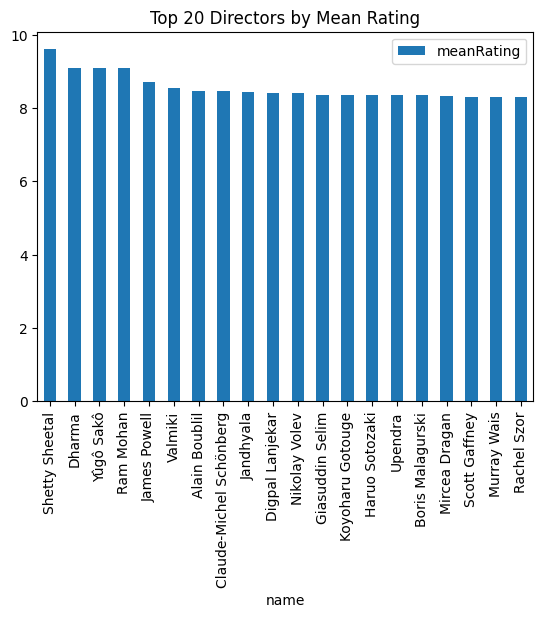

In [ ]:
top_directors.plot(kind='bar', x='name', y='meanRating', title='Top 20 Directors by Mean Rating')

<Axes: title={'center': 'Top 20 Directors by Standard Deviation of Ratings'}, xlabel='name'>

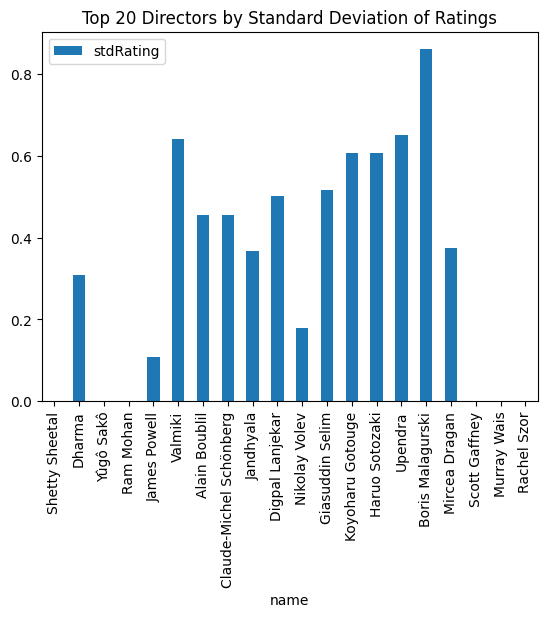

In [ ]:
top_directors.plot(kind='bar', x='name', y='stdRating', title='Top 20 Directors by Standard Deviation of Ratings')

# Feature Engineering - "Genre Versatility Score":

Explanation: Framed this as the most advanced part of the analysis, where you quantify a subjective trait ("versatility") using a concept from information theory (Shannon Entropy).

Observation: Interpreted the final scatter plot, posing the key question it helps answer: "Are the most acclaimed directors specialists or generalists?" I also added a conclusion for the lists of most and least versatile actors, highlighting them as data-driven examples of different career strategies.

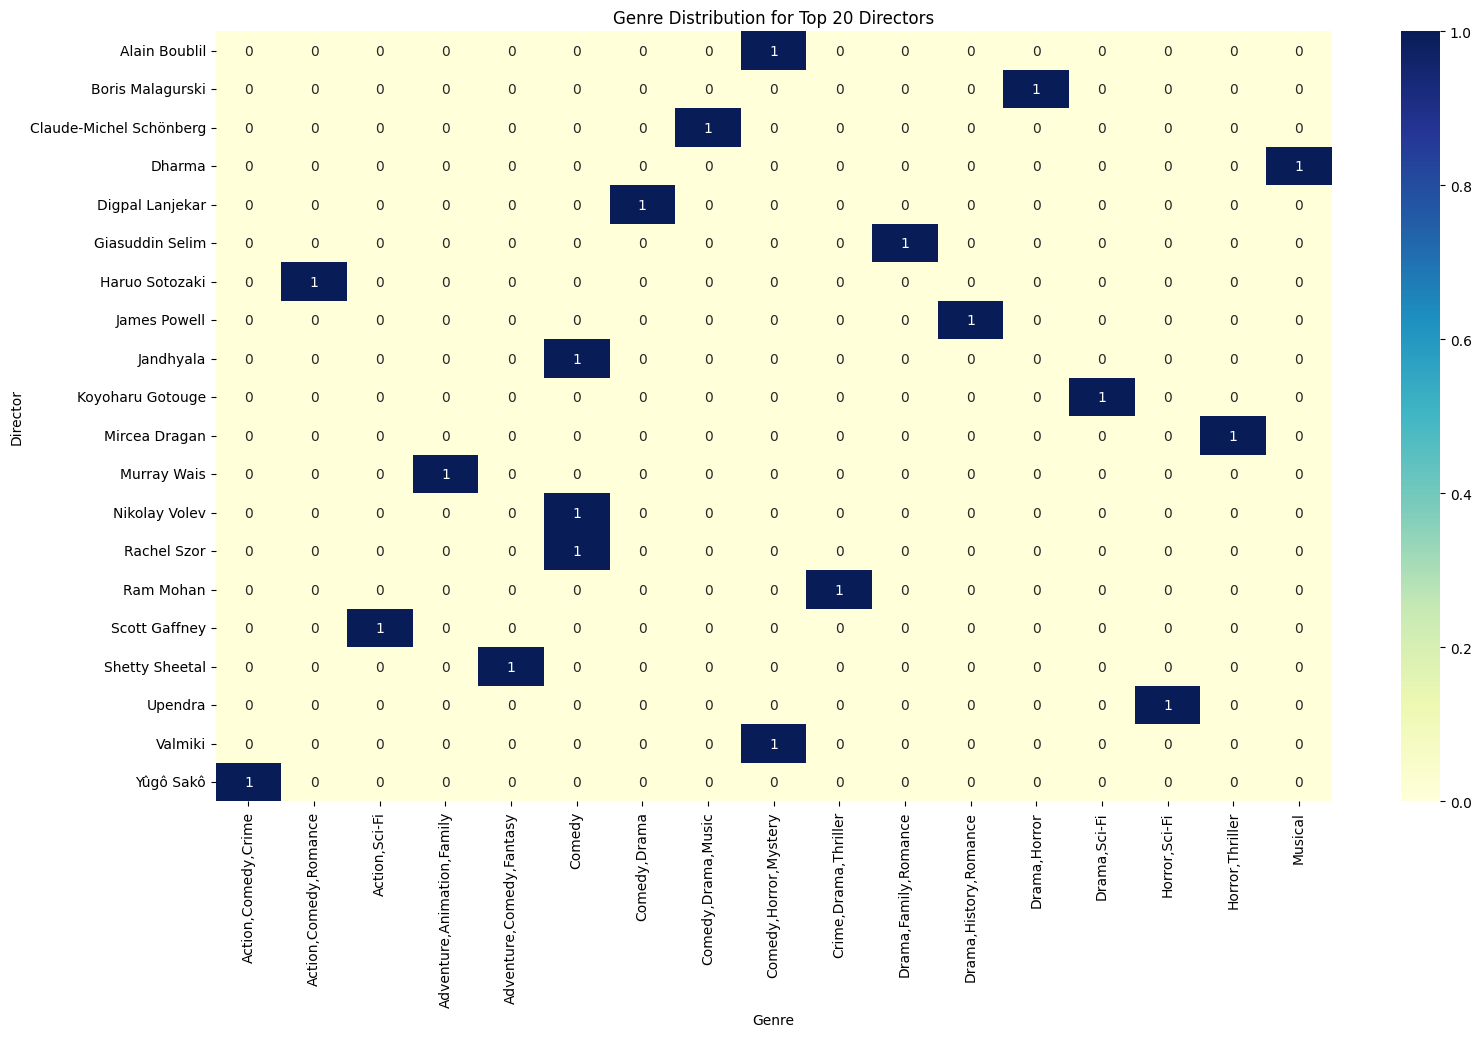

In [ ]:
director_genre_crosstab = pd.crosstab(top_directors['name'], director_main['genre'])
plt.figure(figsize=(18, 10))
sns.heatmap(director_genre_crosstab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Genre Distribution for Top 20 Directors')
plt.xlabel('Genre')
plt.ylabel('Director')
plt.show()

✅ Outcome of Part 3

A complete movie-level dataset enriched with:

Directors

Writers

Principal cast

Ready for advanced feature engineering like:

Star power analysis

Collaborations across decades